# 유튜브 랭킹 시각화

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브랭크1000.csv to 유튜브랭크1000.csv


In [111]:
df = pd.read_csv(filename)
df.tail()

,카테고리,채널명,구독자수,뷰수,비디오수
995,[게임],미소,"510,000","210,770,000","3,084"
996,[미분류],밉지않은 관종언니,"510,000","67,740,000",170
997,[미분류],복지마블TV [Welfare Marble],"510,000","49,960,000",240
998,[음식/요리/레시피],Muggo,"510,000","183,720,000","1,388"
999,[게임],임선비,"510,000","234,290,000","1,134"


# 구독자수 --> 구독자수2(정수)

In [116]:
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df

,카테고리,채널명,구독자수,뷰수,비디오수,비디오수2,조회수2,구독자수2
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371,371,19003810000,64000000
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654,654,18713050000,60300000
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579",1579,12194960000,56400000
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729",3729,21870920000,28500000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,223,11052880000,26500000
...,...,...,...,...,...,...,...,...
995,[게임],미소,"510,000","210,770,000","3,084",3084,210770000,510000
996,[미분류],밉지않은 관종언니,"510,000","67,740,000",170,170,67740000,510000
997,[미분류],복지마블TV [Welfare Marble],"510,000","49,960,000",240,240,49960000,510000
998,[음식/요리/레시피],Muggo,"510,000","183,720,000","1,388",1388,183720000,510000


In [16]:
def str2int(x):
  return int(x.replace(',',''))
  

In [112]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,뷰수,비디오수,비디오수2
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371,371
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654,654
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579",1579
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729",3729
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,223


- 비디오수 Top20 (채널명, 비디오수) 막대 그래프

In [41]:
vt20 = df.pivot_table('비디오수2','채널명').sort_values(by='비디오수2', ascending=False).head(20)
vt20

,비디오수2
채널명,
YTN news,553462
연합뉴스TV,362555
SBS Drama,340878
SBS Entertainment,216725
KBS News,176159
Arirang News,123886
JTBC News,116376
MBCNEWS,115414
KBS Drama,114095


AttributeError: ignored

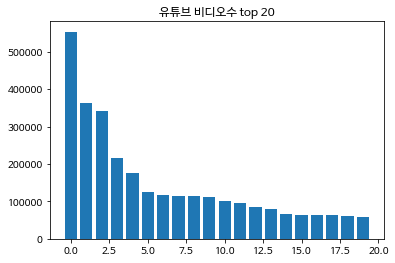

In [113]:
y = vt20.비디오수2
x = np.arange(len(y))
xlabel = vt20.index.to_list()

plt.title('유튜브 비디오수 top 20')
plt.bar(x, y)
plt.xtics(x, xlabel)
plt.xlabel('채널명')
plt.ylabel('뷰수')
plt.grid()
plt.show()

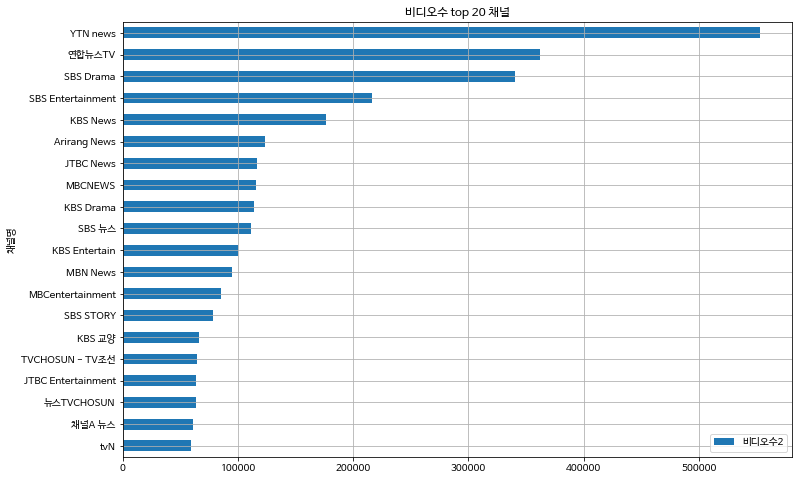

In [57]:
df2 = df[['채널명','비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 top 20 채널')
plt.show()

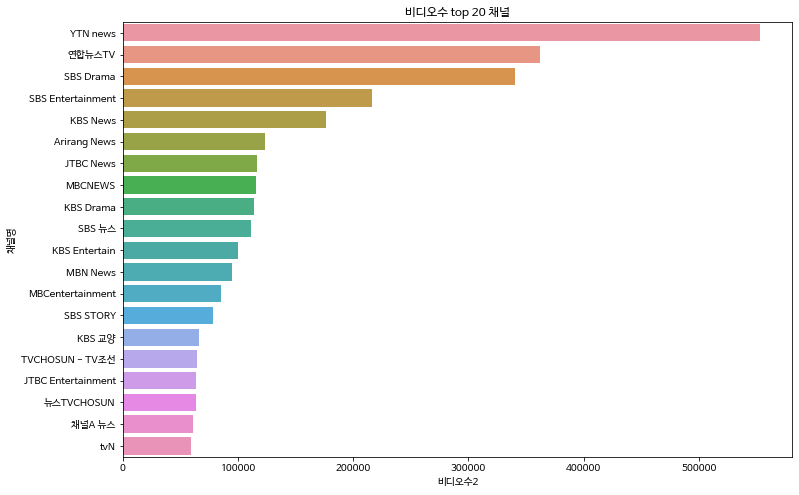

In [70]:
import seaborn as sns

df2 = df[['채널명','비디오수2']].sort_values(by='비디오수2', ascending=False)
plt.figure(figsize=(12,8))
plt.title('비디오수 top 20 채널')
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))

plt.show()

- 조회수 기준 top 20 채널 시각화

In [114]:
df['조회수2'] = df.뷰수.apply(str2int)
df

,카테고리,채널명,구독자수,뷰수,비디오수,비디오수2,조회수2
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371,371,19003810000
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654,654,18713050000
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579",1579,12194960000
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729",3729,21870920000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,223,11052880000
...,...,...,...,...,...,...,...
995,[게임],미소,"510,000","210,770,000","3,084",3084,210770000
996,[미분류],밉지않은 관종언니,"510,000","67,740,000",170,170,67740000
997,[미분류],복지마블TV [Welfare Marble],"510,000","49,960,000",240,240,49960000
998,[음식/요리/레시피],Muggo,"510,000","183,720,000","1,388",1388,183720000


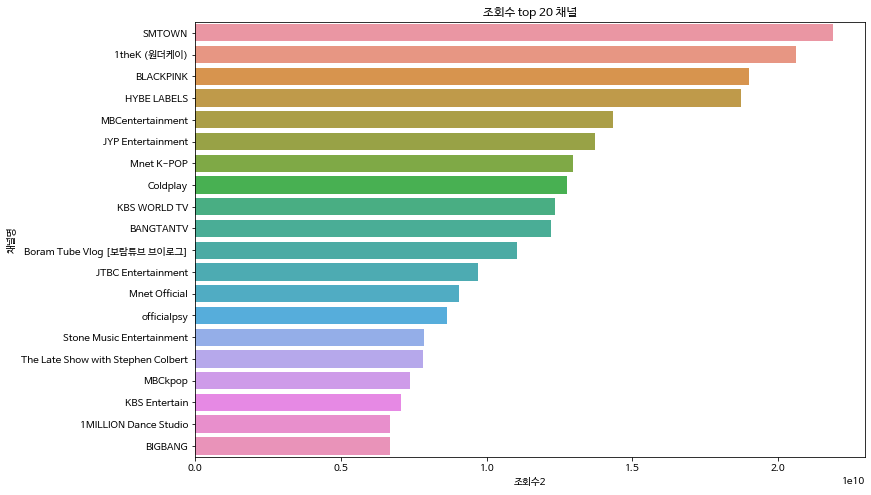

In [79]:
df['조회수2'] = df.뷰수.apply(str2int) #조회수를 뷰수라고 만들어둬서 뷰수

plt.figure(figsize=(12,8))
plt.title('조회수 top 20 채널')
sns.barplot(y='채널명', x='조회수2',  data=df.sort_values(by='조회수2', ascending=False).head(20))

plt.show()

In [ ]:
# 색을 지정 안하면 자동으로 정해줌
df

labels = df3[['채널명']]
sizes = df3[['조회수2']]      # 합이 100이 되도록
explode = (0, 0, 0, 0)      # 그래프중심에서 거리
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, #colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

- 카테고리별 채널수 분포

In [81]:
df.카테고리.value_counts().to_frame() # to_frame():시리즈를 데이터프레임으로 바꿔줌

,카테고리
[음악/댄스/가수],171
[TV/방송],146
[미분류],114
[키즈/어린이],88
[음식/요리/레시피],85
[게임],74
[BJ/인물/연예인],71
[뉴스/정치/사회],53
[패션/미용],44
[취미/라이프],38


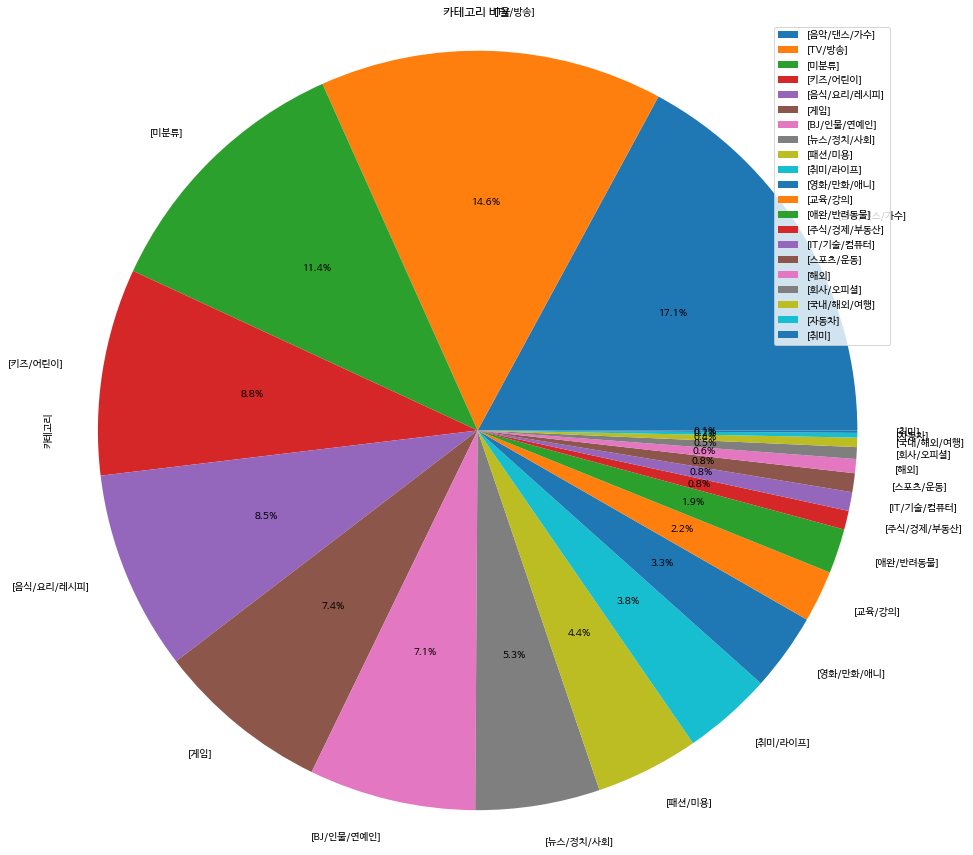

In [107]:
df3 = pd.DataFrame(df.카테고리)

df3.plot.pie(autopct='%.1f%%', subplots=True, figsize=(15,15))
plt.title("카테고리 비율")
plt.axis('equal')
plt.show()

- 카테고리별 구독자수 합계 시각화

In [157]:
df4 = df[['카테고리','구독자수2']].groupby('카테고리').agg(['count','sum'])
df4.columns = ['채널수','구독자수_합계']
df4= df4.sort_values('구독자수_합계', ascending=False)
df4

,채널수,구독자수_합계
카테고리,,
[음악/댄스/가수],171,674180000
[키즈/어린이],88,257740000
[TV/방송],146,229720000
[음식/요리/레시피],85,180570000
[미분류],114,143340000
[BJ/인물/연예인],71,97560000
[뉴스/정치/사회],53,71020000
[게임],74,67170000
[취미/라이프],38,47890000


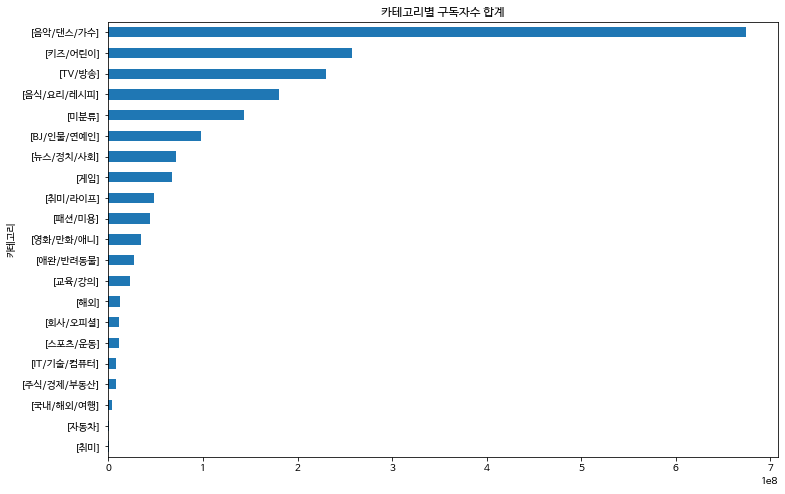

In [169]:
df4.구독자수_합계.sort_values().plot.barh(rot=0, figsize=(12,8))
plt.title('카테고리별 구독자수 합계')
plt.show()

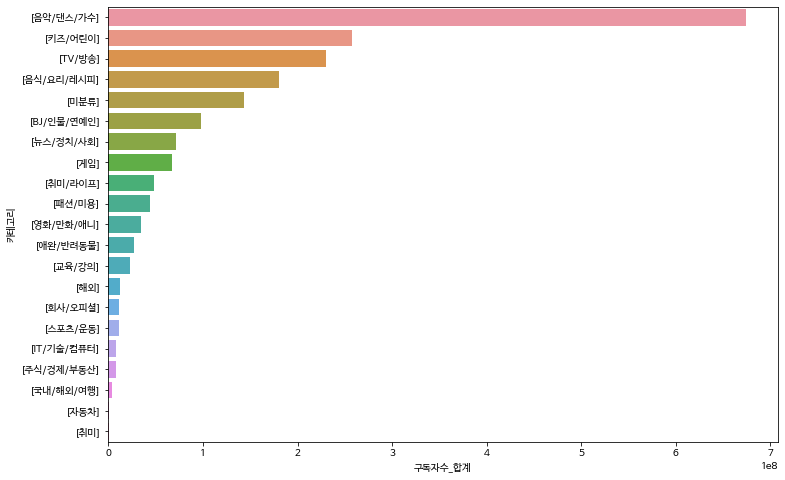

In [158]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계', y=df4.index, data=df4)
plt.show()